# DSC640 Week 1-2 AirLine Dashboard Assignment
# Name: Madhuri Basava
# Date: 6/14/2023

In [1]:
# Import the necessry libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime



### Load the Data

In [2]:
airline_df = pd.read_csv('Airplane_Crashes_and_Fatalities.csv')
airline_df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


### Describe the data

In [3]:

airline_df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [4]:
# Columns
airline_df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [5]:
# Display the missing values in rows
airline_df.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

###  Data Manupulation

In [6]:

#cleaning up
airline_df['Time'] = airline_df['Time'].replace(np.nan, '00:00') 
airline_df['Time'] = airline_df['Time'].str.replace('c: ', '')
airline_df['Time'] = airline_df['Time'].str.replace('c:', '')
airline_df['Time'] = airline_df['Time'].str.replace('c', '')
airline_df['Time'] = airline_df['Time'].str.replace('12\'20', '12:20')
airline_df['Time'] = airline_df['Time'].str.replace('18.40', '18:40')
airline_df['Time'] = airline_df['Time'].str.replace('0943', '09:43')
airline_df['Time'] = airline_df['Time'].str.replace('22\'08', '22:08')
airline_df['Time'] = airline_df['Time'].str.replace('114:20', '00:00') 


# Joining two rows
airline_df['Time'] = airline_df['Date'] + ' ' + airline_df['Time'] 
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
airline_df['Time'] = airline_df['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(airline_df.Time.min()) + ' to ' + str(airline_df.Time.max()))


#To avoid duplicates 
airline_df.Operator = airline_df.Operator.str.upper() 

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


### Data Visualization

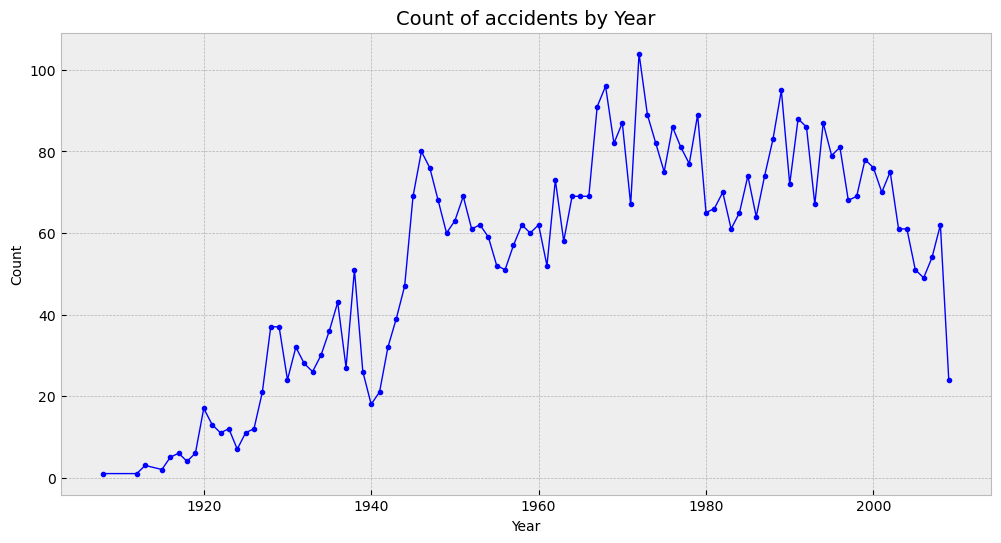

In [7]:
#### Display the total number of accidents per year

Temp = airline_df.groupby(airline_df.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

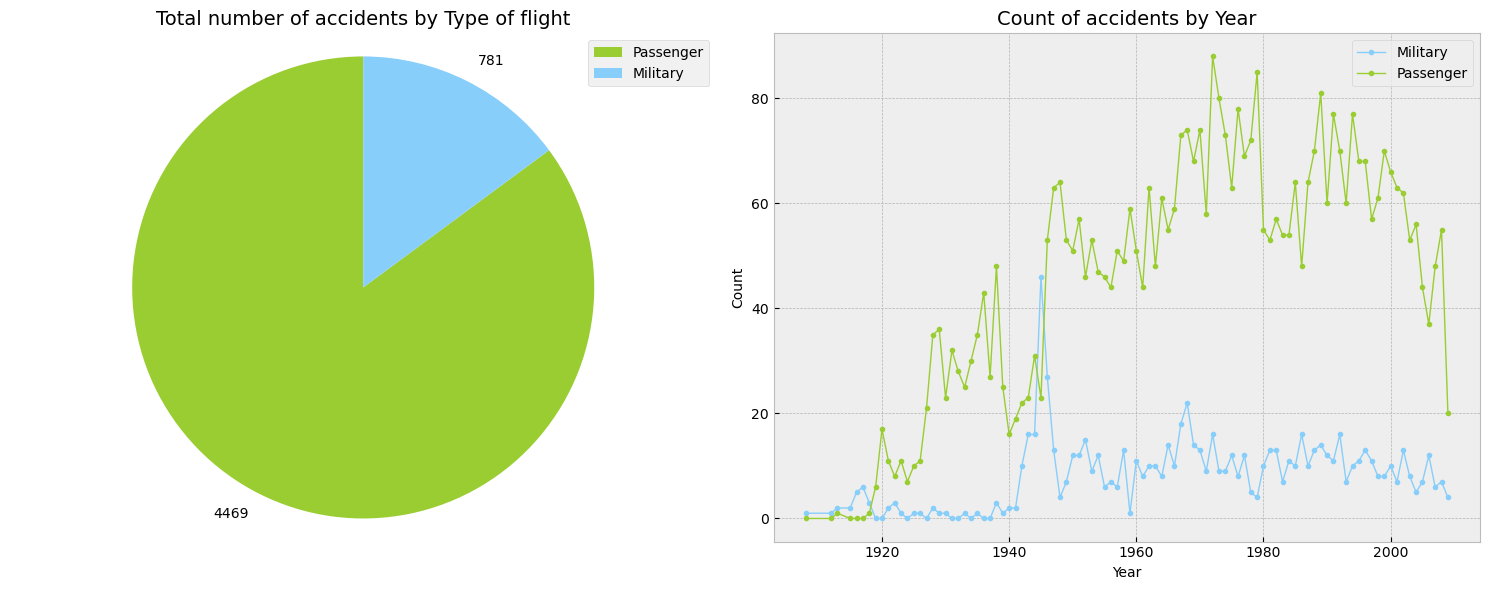

In [8]:
Temp = airline_df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = airline_df.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()
